In [ ]:
pip install keras tensorflow

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [ ]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
  return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
  return 2 * x
# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10): # Manually optimize for 10 steps
  x -= learning_rate * gradient(x)
  print(f"x: {x}, f(x): {f(x)}")

x: 4.0, f(x): 16.0
x: 3.2, f(x): 10.240000000000002
x: 2.56, f(x): 6.5536
x: 2.048, f(x): 4.194304
x: 1.6384, f(x): 2.68435456
x: 1.31072, f(x): 1.7179869184000003
x: 1.0485760000000002, f(x): 1.0995116277760004
x: 0.8388608000000002, f(x): 0.7036874417766403
x: 0.6710886400000001, f(x): 0.45035996273704976
x: 0.5368709120000001, f(x): 0.2882303761517119


In [ ]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
  y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes
print(grad.numpy())

10.0


In [ ]:
import numpy as np
import tensorflow as tf
import time

size=(1000, 1000)
A=np.random.rand(*size)
B=np.random.rand(*size)

start=time.time()
C_numpy=np.dot(A, B)

A_tf=tf.constant(A)
B_tf=tf.constant(B)

start=time.time()
C_tf=tf.matmul(A_tf, B_tf)

print("Numpy time: ", time.time()-start)
print("Tensorflow time: ", time.time()-start)

Numpy time:  0.19610261917114258
Tensorflow time:  0.19634485244750977


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

layer=Dense(64, activation='sigmoid')

In [ ]:
import numpy as np
x_train=np.random.rand(100, 10)
y_train=np.random.rand(100)

weights=np.random.rand(10)

learning_rate=0.1

for epoch in range(10):
  y_pred=np.dot(x_train, weights)
  loss=np.mean((y_pred - y_train)**2)
  gradients=2*np.dot(x_train.T, (y_pred - y_train))/ len(x_train)
  weights -= learning_rate*gradients

  print(f"Epoch {epoch+1}, loss: {loss}")

Epoch 1, loss: 4.174713363231795
Epoch 2, loss: 1.1738365236732706
Epoch 3, loss: 0.40049969630504895
Epoch 4, loss: 0.20048811632882418
Epoch 5, loss: 0.1480652331298568
Epoch 6, loss: 0.13366050859461517
Epoch 7, loss: 0.12907317667637805
Epoch 8, loss: 0.127044162183422
Epoch 9, loss: 0.12570407146485604
Epoch 10, loss: 0.12457066464943513


In [ ]:
import numpy as np
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=(10,)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

x_train=np.random.rand(100, 10)
y_train=np.random.rand(100)
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4537 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2380 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1162 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0835 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0735 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0904 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0846 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0797 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0846 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0775 


# Task 1: Data preparation

In [ ]:
import os

os.listdir('/content/drive/MyDrive/AL and ML')
import zipfile

In [ ]:
zip_path= '/content/drive/MyDrive/AL and ML/devnagari_digit.zip'
extract_to_directory = '/content/drive/MyDrive/AL and ML/extracted_devnagari_digit'
os.makedirs(extract_to_directory, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_to_directory)

print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
extracted_files=os.listdir(extract_to_directory)
print(extracted_files)

['DevanagariHandwrittenDigitDataset']


In [ ]:
import numpy as np
from PIL import Image
import os
from keras.utils import to_categorical
from keras. models import Sequential
from keras.layers import Dense, Flatten
from keras.models import load_model

In [ ]:
def load_images_and_labels(data_dir, size=(28, 28)):
  images = []
  labels = []

  try:
    for folder in os.listdir(data_dir):
      folder_path=os.path.join(data_dir, folder)
      label=int(folder.split('_')[-1])

      for image_filename in os.listdir(folder_path):
        image_path=os.path.join(folder_path, image_filename)
        image=Image.open(image_path).convert('L').resize(size)
        images.append(np.array(image) / 225.0)
        labels.append(label)
    print("Task was successful")
    return np.array(images), to_categorical(np.array(labels), num_classes=10)

  except Exception as e:
    print(f"Task was not successful: {e}")
    return None, None

train_images, train_labels=load_images_and_labels ('/content/drive/MyDrive/AL and ML/extracted_devnagari_digit/DevanagariHandwrittenDigitDataset/Train')
test_images, test_labels=load_images_and_labels ('/content/drive/MyDrive/AL and ML/extracted_devnagari_digit/DevanagariHandwrittenDigitDataset/Test')

if train_images is not None and test_images is not None:
  print("Images and label loaded successfully")
else:
  print("Failed to load images and labels.")

Task was successful
Task was successful
Images and label loaded successfully


# Task 2

In [ ]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation="sigmoid"),
    Dense(128, activation="sigmoid"),
    Dense(256, activation="sigmoid"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Task 3

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Task 4

In [ ]:
history =model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3066 - loss: 1.9508 - val_accuracy: 0.0000e+00 - val_loss: 8.0086
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8183 - loss: 0.5889 - val_accuracy: 0.0000e+00 - val_loss: 9.4836
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9070 - loss: 0.3103 - val_accuracy: 0.0000e+00 - val_loss: 10.0694
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9400 - loss: 0.2141 - val_accuracy: 0.0000e+00 - val_loss: 10.3994
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9561 - loss: 0.1530 - val_accuracy: 0.0000e+00 - val_loss: 10.7245
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9694 - loss: 0.1156 - val_accuracy: 0.0000e+00 - val_loss: 10.7642
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9763 - loss: 0.0926 - val_accuracy: 0.0000e+00 - val_loss: 11.1477
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.980

# Task 5

In [ ]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)
print(f'test accuracy: {test_accuracy*100: .2f}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.3798
test accuracy:  78.53%


# Task 6

In [ ]:
model.save('devnagari_digit_model.h5')
saved_model=load_model('devnagari_digit_model.h5')
test_loss, test_accuracy=saved_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy*100: .2f}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9625 - loss: 0.3798
Test accuracy:  78.53%


# Task 7

In [ ]:
predictions=saved_model.predict(test_images)
predicted_classes=np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Visualization

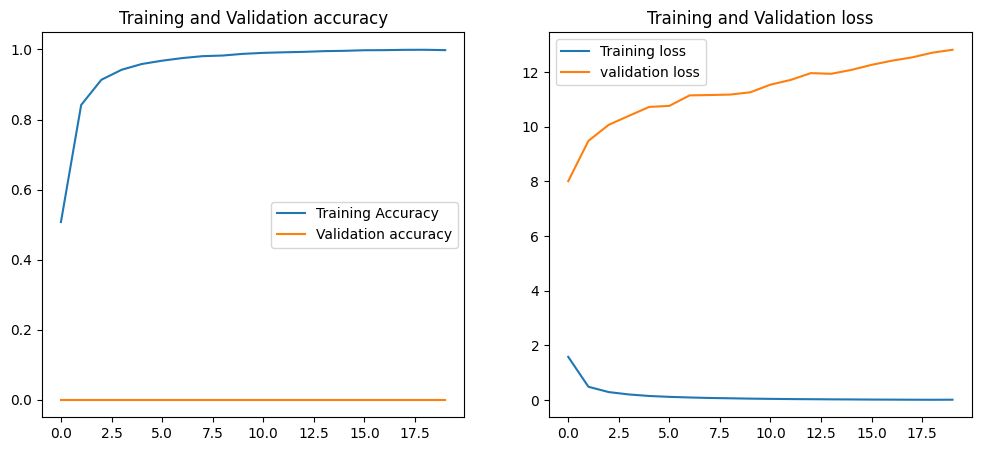

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()